In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [3]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/Iris/iris.data'
p_df_raw = pd.read_csv(abo_path, sep=',', encoding="UTF-8", names=column_names)

In [4]:
p_df_raw.columns = column_names

In [5]:
p_df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
p_df_raw.shape

(150, 5)

In [6]:
p_df_raw.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
p_df_raw["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df_X = p_df_raw.drop("class", axis=1)
df_y = LabelEncoder().fit_transform(list(p_df_raw["class"]))     

In [9]:
df_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [10]:
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)
    kmeans.fit(df_X)
    distorsions.append(kmeans.inertia_)

(0.0, 10.0, 0.0, 160.0)

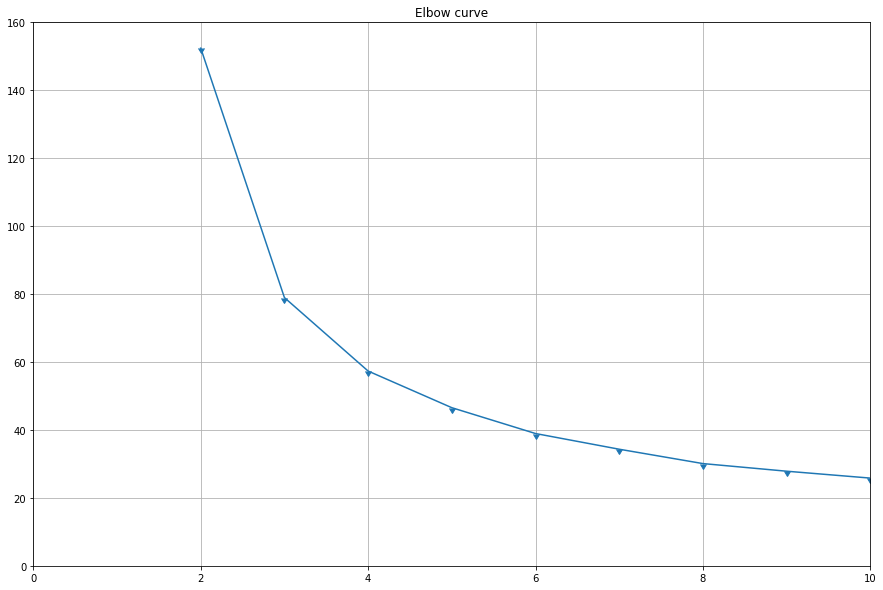

In [11]:
fig = plt.figure(figsize=(15, 10))
plt.plot(range(2, 20), distorsions, marker=11)
#plt.rc('font', size=20)          # controls default text sizes
plt.grid(True)
plt.title('Elbow curve')
plt.axis([0, 10, 0, 160])

In [22]:
estimator = KMeans(n_clusters=4, init='k-means++', n_init=20)
estimator.fit(df_X)

KMeans(n_clusters=4, n_init=20)

In [30]:
len(estimator.labels_)

150

In [24]:
estimator.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

### Internal Measures

In [25]:
from sklearn import metrics

In [26]:
# Perfect labelings are both homogeneous and complete, hence have score 1.0:
# Labelings that assign all classes members to the same clusters are complete be not homogeneous
# Labelings that have pure clusters with members coming from the same classes are homogeneous but un-necessary splits harms completeness
# If classes members are completely split across different clusters, the assignment is totally incomplete

sill = metrics.silhouette_score(df_X, estimator.labels_, metric='euclidean', sample_size=None)  ### best score is 1 [-1,0,1]
db = metrics.davies_bouldin_score(df_X, estimator.labels_) ### best score is 0 
sill, db

(0.49782569010954686, 0.780640036237606)

### External Measures

In [27]:
# A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
# A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
# Both scores have positive values between 0.0 and 1.0, larger values being desirable.
# The V-measure is the harmonic mean between homogeneity and completeness:

In [28]:
print('V_score')
print(metrics.homogeneity_completeness_v_measure(df_y, estimator.labels_))
print('Accuracy')
print(metrics.accuracy_score(df_y, estimator.labels_))
print('Confusion Matrix')
print(metrics.confusion_matrix(df_y, estimator.labels_))
print('Confusion Report')
print(metrics.classification_report(df_y, estimator.labels_))
print('f1 score')
print(metrics.f1_score(df_y, estimator.labels_, average='weighted'))

V_score
(0.8083138423637095, 0.6522113355514313, 0.721920386782096)
Accuracy
0.11333333333333333
Confusion Matrix
[[ 0 50  0  0]
 [ 0  0 23 27]
 [32  0 17  1]
 [ 0  0  0  0]]
Confusion Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.42      0.34      0.38        50
           3       0.00      0.00      0.00         0

    accuracy                           0.11       150
   macro avg       0.11      0.09      0.09       150
weighted avg       0.14      0.11      0.13       150

f1 score
0.12592592592592594


C:\ProgramData\Anaconda3\envs\algo_trading\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Test various cluster numbers and measure their performance

## Related links
### https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
### https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py
### https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html